IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline



Data Collection and Processing

In [ ]:
# loading the csv data to a Panda dataframe
heart_data=pd.read_csv('/content/heart.csv')

In [ ]:
# printing the first 5 rows from the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last  rows from the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# number of rows and columns in dataset
heart_data.shape

(1025, 14)

In [ ]:
# getting information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measure of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variables
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# Percentage of the target variable
n=1025
p=(526/n)*100
print("The percentage with heart disease:",p)
n=(499/n)*100
print("The percentage without heart disease",n)



The percentage with heart disease: 51.31707317073171
The percentage without heart disease 48.68292682926829


<Axes: >

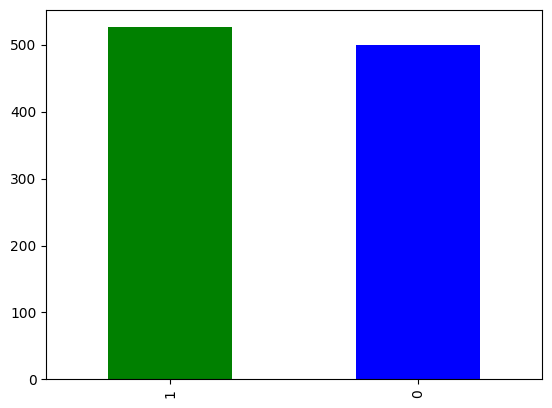

In [ ]:
# bar chart of the target variale
heart_data['target'].value_counts().plot(kind='bar',color=["green","blue"])

1 --> Defective heart

0 -->Healthy heart

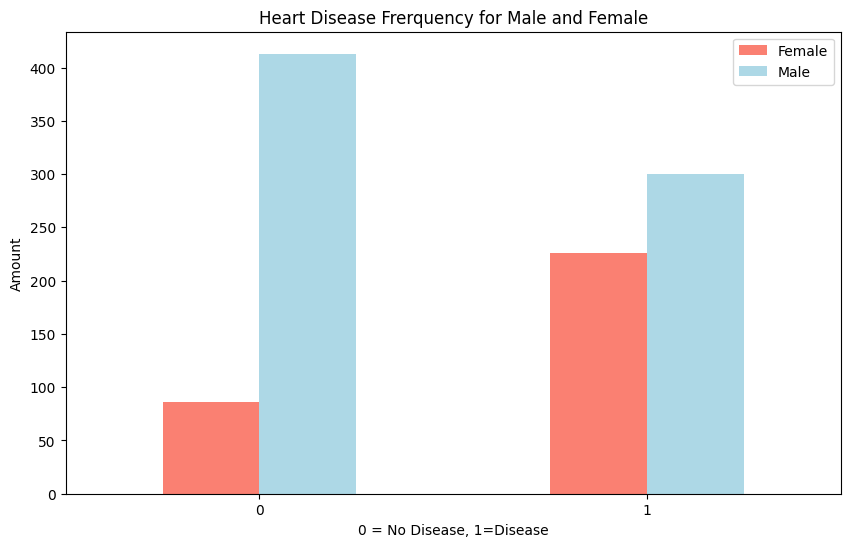

In [ ]:
#Create plot of crosstab
pd.crosstab(heart_data.target, heart_data.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plot.title("Heart Disease Frerquency for Male and Female")
plot.xlabel("0 = No Disease, 1=Disease")
plot.ylabel("Amount")
plot.legend(["Female","Male"]);
plot.xticks(rotation=0);

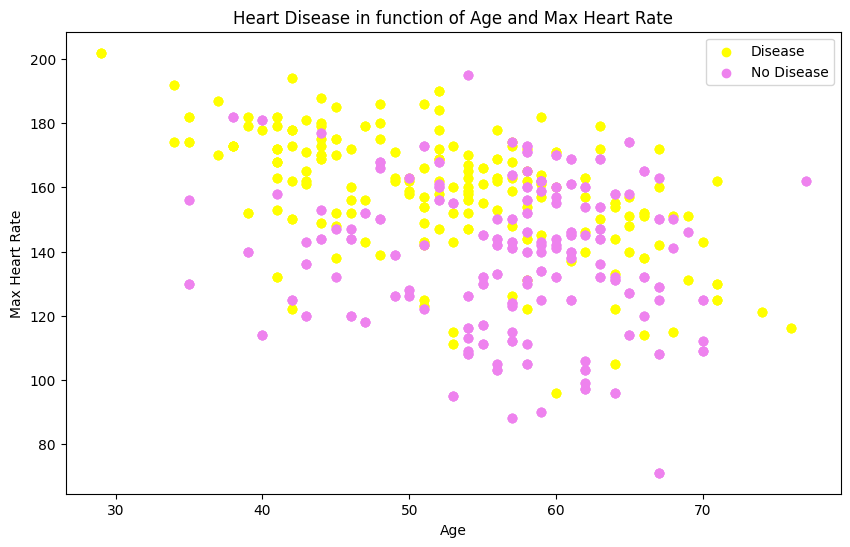

In [ ]:
#Create new figure
plot.figure(figsize=(10,6))

#Scatter with positive examples
plot.scatter(heart_data.age[heart_data.target==1],
           heart_data.thalach[heart_data.target==1],
           c="yellow")

#Scatter with negative examples
plot.scatter(heart_data.age[heart_data.target==0],
           heart_data.thalach[heart_data.target==0],
           c="violet");

#Add some helpful info
plot.title("Heart Disease in function of Age and Max Heart Rate")
plot.xlabel("Age")
plot.ylabel("Max Heart Rate")
plot.legend(["Disease","No Disease"])

<Axes: ylabel='Frequency'>

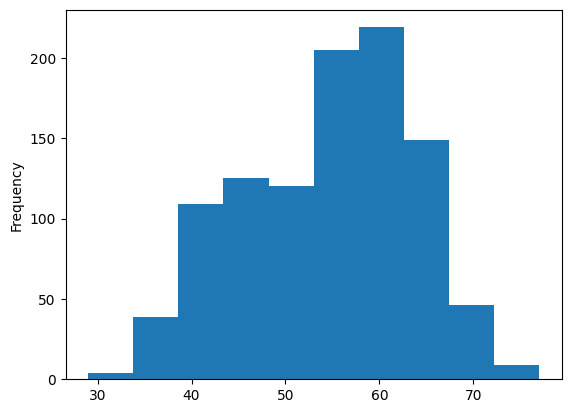

In [ ]:
# frequency table
heart_data.age.plot.hist()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

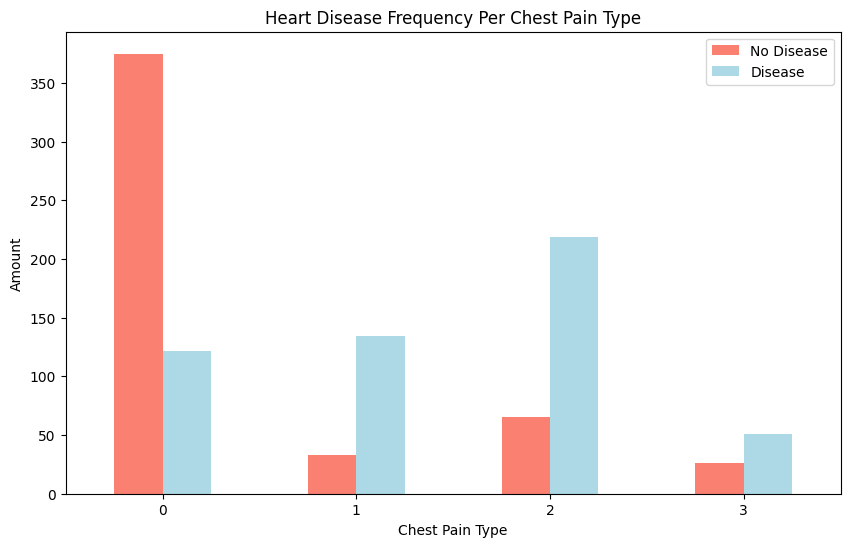

In [ ]:
# Make corsstab visualise
pd.crosstab(heart_data.cp,heart_data.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plot.title("Heart Disease Frequency Per Chest Pain Type")
plot.xlabel("Chest Pain Type")
plot.ylabel("Amount")
plot.legend(["No Disease","Disease"])
plot.xticks(rotation=0)

In [ ]:
# creation correlation matrix
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

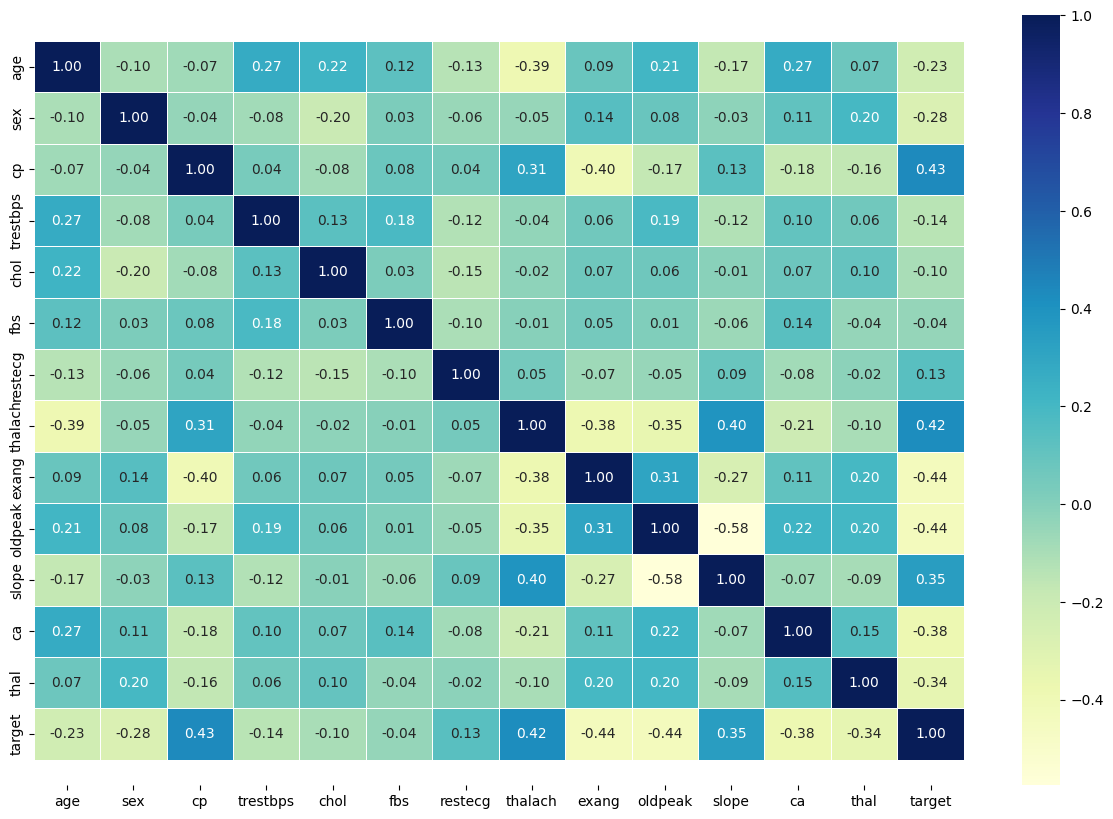

In [ ]:
# visualization of correlation
corr_matrix = heart_data.corr()
fig,ax = plot.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

SPLITING THE FEATURES AND TARGET

In [ ]:
X =heart_data.drop(columns='target',axis=1)
Y =heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


SPLITING THE DATA INTO TRAINING DATA & TEST DATA

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


NORMALIZATION AND FEATURE SELECTION

In [ ]:
# Normalize the features using Z-score normalization (StandardScaler)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
# Initialize a logistic regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Initialize RFE with logistic regression as the estimator and specify the number of desired features
num_features_to_select = 5  # Adjust this to the desired number of features
rfe = RFE(estimator=logistic_reg_model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train_normalized, Y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Transform the training and testing data to include only the selected features
X_train_rfe = rfe.transform(X_train_normalized)
X_test_rfe = rfe.transform(X_test_normalized)

# Train a logistic regression model on the selected features
logistic_reg_model.fit(X_train_rfe, Y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print(f"Selected Features: {selected_features}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Selected Features: Index(['cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')
Accuracy: 0.8048780487804879
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



Model Training

In [ ]:
model=LogisticRegression()

In [ ]:
# training the LogisticRegression model with training data
model.fit(X_train_normalized,Y_train)

LogisticRegression()

Modul Evalution

In [ ]:
# accurcy on training data
X_train_predication=model.predict(X_train_normalized)
train_data_accuracy=accuracy_score(X_train_predication,Y_train)

In [ ]:
print('Accuracy on training data:',round(train_data_accuracy*100,2),'%')

Accuracy on training data: 85.85 %


In [ ]:
# accurcy on test data
X_test_predication=model.predict(X_test_normalized)
test_data_accuracy=accuracy_score(X_test_predication,Y_test)

In [ ]:
print('Accuracy on Test data:',round(test_data_accuracy*100,2),'%')

Accuracy on Test data: 80.49 %


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
X_test_predication=model.predict(X_test_normalized)
cf_matrix=confusion_matrix(Y_test,X_test_predication)
print(cf_matrix)

[[73 27]
 [13 92]]


<Axes: >

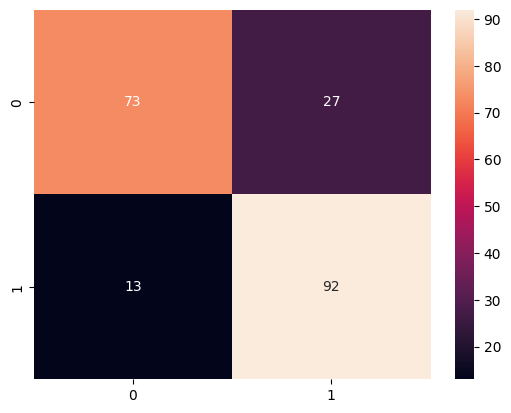

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

Precision

In [ ]:
from sklearn.metrics import precision_score
#precision score on training data prediction
precision_train=precision_score(Y_train,X_train_predication)
print("TRAINING DATA PRECISION=",round(precision_train*100,2), '%')
#precision score on test data prediction
precision_train=precision_score(Y_test,X_test_predication)
print("TEST DATA PRECISION=",round(precision_train*100,2), '%')

TRAINING DATA PRECISION= 83.81 %
TEST DATA PRECISION= 77.31 %


Recall

In [ ]:
from sklearn.metrics import recall_score
#recall score on training data prediction
recall_train=recall_score(Y_train,X_train_predication)
print("TRAINING DATA RECALL=",round(recall_train*100,2), '%')
#recall score on test data prediction
recall_train=recall_score(Y_test,X_test_predication)
print("TRAINING DATA RECALL=",round(recall_train*100,2), '%')


TRAINING DATA RECALL= 89.79 %
TRAINING DATA RECALL= 87.62 %


F1 SCORE

In [ ]:
from sklearn.metrics import f1_score
#f1 score on training data prediction
f1score_train=f1_score(Y_train,X_train_predication)
print("TRAINING DATA F1 SCORE=",round(recall_train*100,2), '%')
#f1 score on test data prediction
f1score_train=f1_score(Y_test,X_test_predication)
print("TRAINING DATA F1 SCORE=",round(recall_train*100,2), '%')


TRAINING DATA F1 SCORE= 87.62 %
TRAINING DATA F1 SCORE= 87.62 %


Building a Predictive system

In [ ]:
input_data=(58,0,0,100,248,0,0,122,0,1,1,0,2)
# change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshape the numpy array(for only one data point)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==0):
  print("The person does not have heart disease")
else:
  print("The person has heart disease")

[0]
The person does not have heart disease


In [73]:
import pickle
pickle_out=open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [74]:
import pickle

In [75]:
filename='trained-model.sav'
pickle.dump(model, open(filename,'wb'))

In [77]:
#loding the saved model
loaded_model=pickle.load(open('trained-model.sav','rb'))

In [78]:
input_data=(58,0,0,100,248,0,0,122,0,1,1,0,2)
# change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshape the numpy array(for only one data point)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==0):
  print("The person does not have heart disease")
else:
  print("The person has heart disease")

[0]
The person does not have heart disease
